### Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### a. Load and preprocess the data, if necessary, preprocessing functions from scikit-learn, compute and display basic statistics, separate the target attribute for regression

In [2]:
###load data
c = pd.read_csv('~/desktop/communities.csv',na_values=['?'])
print c.shape
c.head(5)

(1994, 100)


,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
###examine for missing value
c.isnull().values.any()

True

In [4]:
#the number of missing values
missing = pd.DataFrame(c.isnull().sum()) #sum(): point out how many missing values exist in the collection
missing[missing[0]>0]

,0
OtherPerCap,1


In [5]:
c.OtherPerCap.head()

0    0.36
1    0.22
2    0.28
3    0.36
4    0.51
Name: OtherPerCap, dtype: float64

We can see that there is one missing value in OtherPerCap which is has numarical data, so I'm going to handle this missing value with mean.

In [6]:
O_M = c.OtherPerCap.mean()
O_M = round(O_M,2)
c.OtherPerCap.fillna(O_M, axis=0, inplace=True)
c.isnull().values.any()

False

In [7]:
#basic statistics
c.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,1994,NaN,NaN,NaN,28.6836,16.3976,1,12,34,42,56
communityname,1994,1828,Jacksonvillecity,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1994,NaN,NaN,NaN,0.0575928,0.126906,0,0.01,0.02,0.05,1
householdsize,1994,NaN,NaN,NaN,0.463395,0.163717,0,0.35,0.44,0.54,1
racepctblack,1994,NaN,NaN,NaN,0.179629,0.253442,0,0.02,0.06,0.23,1
racePctWhite,1994,NaN,NaN,NaN,0.753716,0.244039,0,0.63,0.85,0.94,1
racePctAsian,1994,NaN,NaN,NaN,0.153681,0.208877,0,0.04,0.07,0.17,1
racePctHisp,1994,NaN,NaN,NaN,0.144022,0.232492,0,0.01,0.04,0.16,1
agePct12t21,1994,NaN,NaN,NaN,0.424218,0.155196,0,0.34,0.4,0.47,1
agePct12t29,1994,NaN,NaN,NaN,0.493867,0.143564,0,0.41,0.48,0.54,1


In [8]:
#split target from data
c_target = c.ViolentCrimesPerPop
c_target.head(5)

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [9]:
# training data without target 
c_records = c.drop(['ViolentCrimesPerPop','state','communityname'],axis = 1) #don't do 'inplace = True' or output would be none
c_records.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


#### b. Perform standard linear regression on data, compute the RMSE value on the full training data, plot the correlation between the predicted and actual values of the target attribute, display the obtained regression coefficients (weights), finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE

In [10]:
#transform dataframe to numpy array
c_records = np.array(c_records)
c_target = np.array(c_target)
print c_records.shape
print c_target.shape

(1994, 97)
(1994,)


In [11]:
# create a column of 1s for training to build a model
x = np.array([np.concatenate((v,[1])) for v in c_records])
y = np.array(c_target)
print x
print y

[[0.19 0.33 0.02 ... 0.26 0.2  1.  ]
 [0.   0.16 0.12 ... 0.12 0.45 1.  ]
 [0.   0.42 0.49 ... 0.21 0.02 1.  ]
 ...
 [0.16 0.37 0.25 ... 0.32 0.18 1.  ]
 [0.08 0.51 0.06 ... 0.38 0.33 1.  ]
 [0.2  0.78 0.14 ... 0.3  0.05 1.  ]]
[0.2  0.67 0.43 ... 0.23 0.19 0.48]


In [12]:
def stdReg(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T *xMat
    if np.linalg.det(xTx) == 0.0:
        print "This matrix can't be inversed"
        return
    ws = xTx.I*(xMat.T*yMat)
    return ws

In [13]:
w = stdReg(x,y)

In [14]:
print w.T

[[ 1.31093805e-01 -3.14100662e-02  2.09908716e-01 -4.05385831e-02
  -1.38904323e-02  5.89776516e-02  1.23390581e-01 -2.22623769e-01
  -1.47490371e-01  5.01687632e-02 -2.42394462e-01  4.64016523e-02
  -1.96947658e-01 -2.06118631e-01  4.65946123e-02 -1.77214568e-01
   6.30098283e-02  1.14945273e-02 -9.08945120e-02  2.74640078e-01
   1.01760657e-01 -3.31524098e-01 -2.91820758e-02 -3.54488688e-02
   2.26189575e-02  4.31271541e-02  3.44300469e-02  1.28406193e-01
  -1.91288748e-01 -1.00765988e-01  6.46810941e-02  1.06064411e-01
   4.24127557e-06  2.34984135e-01 -3.75708490e-02 -7.74911084e-03
   4.66789319e-01  2.26297553e-01  1.74627044e-01 -5.75219311e-01
  -1.41953031e-01  5.68774652e-02 -3.51063065e-01 -3.49527571e-02
   4.62623400e-04  5.57018825e-02 -1.82239492e-01 -1.54645199e-01
   1.26173562e-01 -1.44317736e-01  2.39043166e-02  3.33466534e-02
  -7.42331021e-02  3.59825326e-02 -3.31608867e-02 -2.18197559e-01
   4.45780865e-01 -2.00008120e-01 -2.67224432e-02 -1.41453050e-01
   6.38041

In [15]:
###compute RMSE
xMat = np.mat(x)
yMat = np.mat(y)
yHat = xMat*w
yHatT = np.array(yHat).T

In [16]:
#vector of error
err = abs(yHatT - yMat)
#dot product of vector with itself so we can get the sum of errors
tot_err=np.dot(err,err.T)
RMSE_train = np.sqrt((tot_err)/len(yHat))
print 'The RMSE of training is % .5f' % RMSE_train

The RMSE of training is  0.12889


<function matplotlib.pyplot.show>

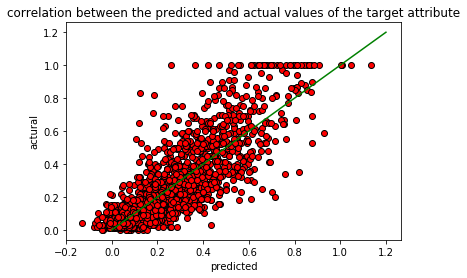

In [17]:
### correlation between the predicted and actual values of the target attribute
plt.plot(yHatT,yMat,'ro',mec = 'black')
plt.plot([0,1.2],[0,1.2],'g-')
plt.title('correlation between the predicted and actual values of the target attribute')
plt.xlabel('predicted')
plt.ylabel('actural')
plt.show

In [18]:
### correlation between predicted & actural
np.corrcoef(yHatT, yMat)

array([[1.        , 0.83295034],
       [0.83295034, 1.        ]])

so predicted and actural values are relatively high correlated with correlation about 0.83.

In [19]:
### display regression coefficients(weights)
print 'regression coefficients are' , w

regression coefficients are [[ 1.31093805e-01]
 [-3.14100662e-02]
 [ 2.09908716e-01]
 [-4.05385831e-02]
 [-1.38904323e-02]
 [ 5.89776516e-02]
 [ 1.23390581e-01]
 [-2.22623769e-01]
 [-1.47490371e-01]
 [ 5.01687632e-02]
 [-2.42394462e-01]
 [ 4.64016523e-02]
 [-1.96947658e-01]
 [-2.06118631e-01]
 [ 4.65946123e-02]
 [-1.77214568e-01]
 [ 6.30098283e-02]
 [ 1.14945273e-02]
 [-9.08945120e-02]
 [ 2.74640078e-01]
 [ 1.01760657e-01]
 [-3.31524098e-01]
 [-2.91820758e-02]
 [-3.54488688e-02]
 [ 2.26189575e-02]
 [ 4.31271541e-02]
 [ 3.44300469e-02]
 [ 1.28406193e-01]
 [-1.91288748e-01]
 [-1.00765988e-01]
 [ 6.46810941e-02]
 [ 1.06064411e-01]
 [ 4.24127557e-06]
 [ 2.34984135e-01]
 [-3.75708490e-02]
 [-7.74911084e-03]
 [ 4.66789319e-01]
 [ 2.26297553e-01]
 [ 1.74627044e-01]
 [-5.75219311e-01]
 [-1.41953031e-01]
 [ 5.68774652e-02]
 [-3.51063065e-01]
 [-3.49527571e-02]
 [ 4.62623400e-04]
 [ 5.57018825e-02]
 [-1.82239492e-01]
 [-1.54645199e-01]
 [ 1.26173562e-01]
 [-1.44317736e-01]
 [ 2.39043166e-02]
 [ 

In [20]:
### 10-fold cross-validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state=33)

kf = KFold(len(x_train),n_folds = 10)
sse_cv = 0
for train ,test in kf:
    w_cv = stdReg(x_train[train],y_train[train])
    yHat_cv  = np.array(np.dot(x_train[test],w_cv))[:,0]
    err_cv = yHat_cv-y_train[test] 
    sse_cv += np.dot(err_cv,err_cv)

rmse_cv = np.sqrt(sse_cv/len(y_train))

print 'The RMSE of 10 cross-validation is % .5f' % rmse_cv
print 'The RMSE of training is % .5f' % RMSE_train

The RMSE of 10 cross-validation is  0.13455
The RMSE of training is  0.12889


In [21]:
### compare the cross-validation RMSE to the training RMSE

From the results above, we can see that RMSEs of 10 cross-validation and training are small and the difference between them is very little for only about 0.01, which means this linear regression has good predicting ability and don't have over or under fitting problem. 

#### c. Use the scikit-learn regression model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use.  Your approach should use k-fold cross-validation on the training data (you can use k=5). Show the list of most informative variables and their weights. Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features 

In [22]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import cross_validation

In [23]:
# difine x and y and model
x = np.array([np.concatenate((v,[1])) for v in np.array(c_records)])
X = c.drop(['ViolentCrimesPerPop','state','communityname'],axis = 1)
y = np.array(c_target).T

In [24]:
# split training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 33)

In [25]:
#model
#w_cv = stdReg(x_train[train],y_train[train])
#yHat_cv  = np.array(np.dot(x_train[test],w_cv))[:,0]

In [26]:
###find the best percentile using cross-validation

from sklearn import cross_validation

# Create linear regression object
linreg = LinearRegression()

percentiles = range(1,100,5)
results =[]

for i in range (1,100,5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    x_train_fs = fs.fit_transform(x_train , y_train) #fit_transform means fit the model then return the i percents of x
    #MAE scoring calculated by sklearn package is negative in default, so we have to use abs value to transform it.
        # *what if we don't define scoring? in classification(like decision tree) we don't have to since it would be accuracy of the classifier
        # *but in regression, scoring has to be defined(like MAE or RMSE)
    scores = abs(cross_validation.cross_val_score(linreg,x_train_fs,y_train, scoring='neg_mean_absolute_error',cv=5)) 
    results = np.append(results,scores.mean())
    
optimal_percentile = np.where(results == results.min())[0] #results should be an array and np.where give an individual array like [n]
optimal_percentile = int(optimal_percentile)
print "Optimal percentile of features:", percentiles[optimal_percentile], "\n"
optimal_number_features = int((percentiles[optimal_percentile]*len(X.columns)/100)) # percentile is the number without % so has to be divided by 100 
print 'Optimal number of features:', optimal_number_features , '\n'

/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in divide
  corr /= X_norms
/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Optimal percentile of features: 41 

Optimal number of features: 39 



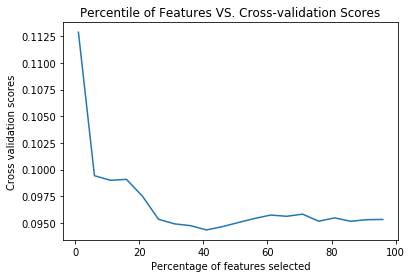

In [27]:
### Plot percentile of features VS. cross-validation scores
plt.figure()
plt.title('Percentile of Features VS. Cross-validation Scores')
plt.xlabel("Percentage of features selected")
plt.ylabel("Cross validation scores") # here means MAE scores on Cross validation of training data 
plt.plot(percentiles,results)

In [28]:
### Show the list of most informative variables and their weights. 
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train) # select 41% of x for feature selection

for i in range(len(X.columns.values)): # number of x columns/features
    if fs.get_support()[i]:    #fs.get_support returns if feature is selected or not for the model 
        print X.columns.values[i],'\t', fs.scores_[i]

population 	256.0323547372117
racepctblack 	1074.8895092675157
racePctWhite 	1412.5078123926207
numbUrban 	247.77613854814723
medIncome 	341.63253752319906
pctWWage 	161.57075094156951
pctWInvInc 	756.0149723312611
pctWPubAsst 	784.570640809257
medFamInc 	366.9004218440579
perCapInc 	214.99315799069285
NumUnderPov 	400.3078568907942
PctPopUnderPov 	578.8173652137629
PctLess9thGrade 	319.218108101924
PctNotHSGrad 	472.1962078690577
PctBSorMore 	173.36684318428595
PctUnemployed 	533.9131521991943
PctEmploy 	190.46526246383934
MalePctDivorce 	602.7748935815906
FemalePctDiv 	704.7727390048145
TotalPctDiv 	693.1378303821915
PctFam2Par 	1657.8650169982222
PctKids2Par 	1972.804063866535
PctYoungKids2Par 	1342.1736137875996
PctTeen2Par 	1299.5351058427048
NumIlleg 	431.63556026913983
PctIlleg 	1936.1208737826828
PctLargHouseFam 	241.23381636030106
PctPersOwnOccup 	630.760339373974
PctPersDenseHous 	375.6459018761192
PctHousLess3BR 	487.96168084238747
MedNumBR 	242.06642994789516
HousVacant 	33

In [29]:
###Mean absolute error (MAE) on the testing data
from sklearn.metrics import mean_squared_error

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
X_train_fs = fs.fit_transform(x_train, y_train) # 41% selected features/variables
linreg = LinearRegression() 
linreg.fit(x_train_fs, y_train) # return y_test based on the model we made
x_test_fs = fs.transform(x_test)# 41% selected features /varibles for x_test
p  = linreg.predict(x_test_fs) # return y_test based on the model 
MAE = mean_squared_error(y_test, p)
print 'Mean absolute Error (MAE) of the testing data is %0.5f' % MAE

Mean absolute Error (MAE) of the testing data is 0.02115


#### d. Ridge Regression and Lasso Regression. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. You should create a function that takes as input the data and target variable; the parameter; the model;  and any other input needed to determine the optimal value for the specified parameter. You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally,  run the model on the set-aside test data. Discuss your observation and conclusions.

In [30]:
#Alpha in regression is just an model parameter not coefficient appearing in model function
#model selection here is to select model based on one model parameter through different regression method
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error

In [31]:
#define x and y 
x = np.array([np.concatenate((v,[1])) for v in np.array(c_records)]) 
X = c.drop(['ViolentCrimesPerPop','state','communityname'],axis = 1)
y = np.array(c_target).T
#split data to training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 33)

In [32]:
#Assign Ridge Regression and Lasso Regression
ridreg = Ridge()
lasreg = Lasso()

In [33]:
#calculate the parameter of model with selected features we made in last question
def calc_params(X, y, param_name, param_values, model, name, K=5): 
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values (parameter value means model parameters lised in fs.get_params() command, including max_depth,criterion, etc)
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value}) #** means allow to input multiple variables, : is for format
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation # made K fold/groups of training data(which is in 80% part of data we made before) made by sklearn package
        cv = KFold(len(X), K, shuffle=True, random_state=0) #len(x) = number of rows of x
        
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE scores on train and test sets
            model.fit([X[k] for k in train], y[train]) # fit each k fold in the model #[X[k] for k in train] = X[train]
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            #store the means of k fold value 
                #- it's different with example in example here https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb, 
                #- because our score was detined as mean_absolute_error, so we have to calculate MAE first then transfrom to np
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
    
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Absolute Errors")
    plt.title('Mean Absolute Errors vs '+ param_name +' in '+ name +' model')

    # return the training and testing scores on each parameter value
        #getting train and test scores is to compare if there is over/underfitting for model
    return train_scores, test_scores

#Note: so here we use trainning data under K fold cross validation to find optimal parameter, and 
#      then we'll make full model with optimal parameter we got using full train/test data, and validate by full test data 

In [34]:
# Let's create an evenly spaced range of numbers in a specified interval
alpha = np.linspace(0.0001, 200,500) #np.linspace is to limit the range of value(start, stop, number of value)
alpha = np.array([float(e) for e in alpha])
param_values = alpha

In [35]:
### Ridge & Lasso Regression

In [36]:
def get_param(func, model_name):
    train_scores, test_scores = calc_params(x_train, y_train, "alpha", param_values, func, model_name, K=5)
    min_err_score_idx = np.where(test_scores == test_scores.min())
    min_err_score_alpha = param_values[min_err_score_idx]
    max_err_score_idx = np.where(test_scores == test_scores.max())
    max_err_score_alpha = param_values[max_err_score_idx]
    print 'The minimum Mean Absolute Error (MAE) on training data:', test_scores[min_err_score_idx][0],'with alpha:', min_err_score_alpha[0]

The minimum Mean Absolute Error (MAE) on training data: 0.09570450606098999 with alpha: 3.20651122244489


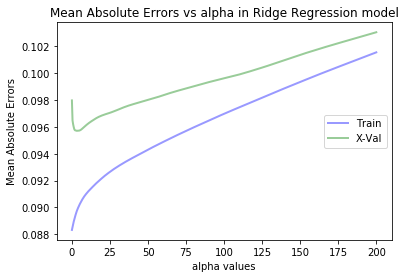

In [37]:
get_param(ridreg, "Ridge Regression")

In [38]:
ridreg = Ridge(fit_intercept=True, alpha=3.20651122244489)
ridreg.fit(x_train, y_train)    
p = ridreg.predict(x_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err) # sum of squares of error
rmse = np.sqrt(sse/len(y_test)) #root-mean-square error

print 'RMSE on test data: %0.5f' % rmse, 'using alpha = 3.20651122244489 as suggested above'
print 'Mean absolute error on test data: %0.5f' % MAE,'using alpha = 3.20651122244489 as suggested above'

RMSE on test data: 0.14416 using alpha = 3.20651122244489 as suggested above
Mean absolute error on test data: 0.02078 using alpha = 3.20651122244489 as suggested above


The minimum Mean Absolute Error (MAE) on training data: 0.09696944490506058 with alpha: 0.0001


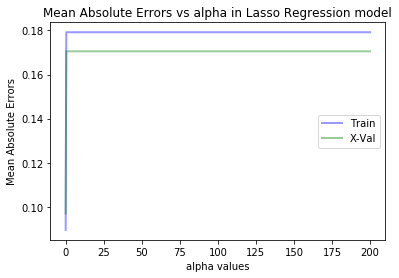

In [39]:
get_param(lasreg, "Lasso Regression")

In [40]:
lasreg = Lasso(fit_intercept=True, alpha=0.0001)
lasreg.fit(x_train, y_train)    
p = lasreg.predict(x_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))
print 'Mean absolute error on test data: %0.5f' % MAE,'using alpha = 0.0001 as suggested above'
print 'RMSE on test data: %0.5f' % rmse, 'using apha = 0.0001 as suggested above'

Mean absolute error on test data: 0.02061 using alpha = 0.0001 as suggested above
RMSE on test data: 0.14357 using apha = 0.0001 as suggested above


From above, we can see that:
for Lasso Regression, the mean absolute error increases when the alpha increases, which means lower alpha is best for Lasso Regression. By observing the plot (MAE vs Alpha), the MAE value are very close between train and test set of Training data. However, the change of value of alpha doesn't give any improvement on the MAE. The best alpha value is 0.0001.<br>
For Ridge Regression, the mean absolute error decreases at very first begining(close to 0) and then increase as alpha increase. So the best model for Ridge regression is with alpha that is very small. The MAE value between Training and testing set is very close, so that it could prove that there is no obvious overfitting occuring in the case.<br>
Comparing both of them, we could see that the alpha value of Lasso which is 0.0001 is very small. The feature of Lasso model adds penalty equivalent to absolute value of the magnitude of coefficients. So that the small value alpha 0.0001 shows the Lasso model does not make a lot of penalty to the original model. Another feeature of Lasso is that it could help to perform a feature selection. In this case, the feature selection feature does not quite function well when the small alpha 0.0001. On the contrary, the Ridge Regression with Alpha 3.2065 shows the optimal result. Also, Ridge helps to improve the over-fitting problem in this case because the higher of Alpha tends to have lower MAE, or might even turns into under-fitting. In conclusion, Ridge regression would be the best model for this analysis.

#### e. Perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. <br>For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [41]:
#Grid Search allows us to more systemiatically explore different combinations of multiple parameters
# difine x and y and model
x = np.array([np.concatenate((v,[1])) for v in np.array(c_records)])
X = c.drop(['ViolentCrimesPerPop','state','communityname'],axis = 1)
y = np.array(c_target).T

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
scaler = StandardScaler()
scaler.fit(x)
x_norm = scaler.transform(x) #normalization 

/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [43]:
# split data
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y, test_size=0.2, random_state=22)

In [44]:
#Preset SGDRegressor parameters
sgdreg=SGDRegressor()
parameters={'penalty':['l1', 'l2']
         ,'alpha': np.linspace(0.0001,100,400)}
gs = GridSearchCV(sgdreg, parameters, verbose=2, cv=5) # verbose is to show intermediate value 

In [45]:
sgdreg = SGDRegressor()

In [46]:
###compare combinations of two penalty parameters ('l1', 'l2','elasticnet') and different values of alpha 
gs.fit(x_norm, y) #here should be full training x and y.

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................


/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.2507263157894737 ............................
[CV] .

[CV] ................... penalty=l1, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l2, alpha=1.5038578947368422 ............................
[CV] ................... penalty=l2, alpha=1.5038578947368422 -   0.0s
[CV] penalty=l1, alpha=1.7544842105263159 ............................
[CV] ................... penalty=l1, alpha=1.7544842105263159 -   0.0s
[CV] penalty=l1, alpha=1.7544842105263159 ............................
[CV] .

[CV] ................... penalty=l1, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l2, alpha=3.0076157894736846 -   0.1s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l2, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l2, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l2, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l2, alpha=3.0076157894736846 ............................
[CV] ................... penalty=l2, alpha=3.0076157894736846 -   0.0s
[CV] penalty=l1, alpha=3.2582421052631583 ............................
[CV] ................... penalty=l1, alpha=3.2582421052631583 -   0.0s
[CV] penalty=l1, alpha=3.2582421052631583 ............................
[CV] .

[CV] .................... penalty=l2, alpha=4.511373684210526 -   0.0s
[CV] penalty=l2, alpha=4.511373684210526 .............................
[CV] .................... penalty=l2, alpha=4.511373684210526 -   0.0s
[CV] penalty=l2, alpha=4.511373684210526 .............................
[CV] .................... penalty=l2, alpha=4.511373684210526 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] ................... penalty=l1, alpha=4.7620000000000005 -   0.0s
[CV] penalty=l1, alpha=4.7620000000000005 ............................
[CV] .

[CV] .................... penalty=l1, alpha=6.265757894736842 -   0.0s
[CV] penalty=l1, alpha=6.265757894736842 .............................
[CV] .................... penalty=l1, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l2, alpha=6.265757894736842 .............................
[CV] .................... penalty=l2, alpha=6.265757894736842 -   0.0s
[CV] penalty=l1, alpha=6.516384210526316 .............................
[CV] .

[CV] .................... penalty=l1, alpha=7.769515789473685 -   0.0s
[CV] penalty=l1, alpha=7.769515789473685 .............................
[CV] .................... penalty=l1, alpha=7.769515789473685 -   0.0s
[CV] penalty=l1, alpha=7.769515789473685 .............................
[CV] .................... penalty=l1, alpha=7.769515789473685 -   0.0s
[CV] penalty=l2, alpha=7.769515789473685 .............................
[CV] .................... penalty=l2, alpha=7.769515789473685 -   0.0s
[CV] penalty=l2, alpha=7.769515789473685 .............................
[CV] .................... penalty=l2, alpha=7.769515789473685 -   0.0s
[CV] penalty=l2, alpha=7.769515789473685 .............................
[CV] .................... penalty=l2, alpha=7.769515789473685 -   0.0s
[CV] penalty=l2, alpha=7.769515789473685 .............................
[CV] .................... penalty=l2, alpha=7.769515789473685 -   0.0s
[CV] penalty=l2, alpha=7.769515789473685 .............................
[CV] .

[CV] .................... penalty=l1, alpha=9.273273684210526 -   0.0s
[CV] penalty=l1, alpha=9.273273684210526 .............................
[CV] .................... penalty=l1, alpha=9.273273684210526 -   0.0s
[CV] penalty=l1, alpha=9.273273684210526 .............................
[CV] .................... penalty=l1, alpha=9.273273684210526 -   0.0s
[CV] penalty=l1, alpha=9.273273684210526 .............................
[CV] .................... penalty=l1, alpha=9.273273684210526 -   0.0s
[CV] penalty=l2, alpha=9.273273684210526 .............................
[CV] .................... penalty=l2, alpha=9.273273684210526 -   0.0s
[CV] penalty=l2, alpha=9.273273684210526 .............................
[CV] .................... penalty=l2, alpha=9.273273684210526 -   0.0s
[CV] penalty=l2, alpha=9.273273684210526 .............................
[CV] .................... penalty=l2, alpha=9.273273684210526 -   0.0s
[CV] penalty=l2, alpha=9.273273684210526 .............................
[CV] .

[CV] penalty=l2, alpha=10.77703157894737 .............................
[CV] .................... penalty=l2, alpha=10.77703157894737 -   0.0s
[CV] penalty=l2, alpha=10.77703157894737 .............................
[CV] .................... penalty=l2, alpha=10.77703157894737 -   0.0s
[CV] penalty=l2, alpha=10.77703157894737 .............................
[CV] .................... penalty=l2, alpha=10.77703157894737 -   0.0s
[CV] penalty=l2, alpha=10.77703157894737 .............................
[CV] .................... penalty=l2, alpha=10.77703157894737 -   0.0s
[CV] penalty=l2, alpha=10.77703157894737 .............................
[CV] .................... penalty=l2, alpha=10.77703157894737 -   0.0s
[CV] penalty=l1, alpha=11.027657894736842 ............................
[CV] ................... penalty=l1, alpha=11.027657894736842 -   0.0s
[CV] penalty=l1, alpha=11.027657894736842 ............................
[CV] ................... penalty=l1, alpha=11.027657894736842 -   0.0s
[CV] p

[CV] .................... penalty=l2, alpha=12.28078947368421 -   0.0s
[CV] penalty=l2, alpha=12.28078947368421 .............................
[CV] .................... penalty=l2, alpha=12.28078947368421 -   0.0s
[CV] penalty=l2, alpha=12.28078947368421 .............................
[CV] .................... penalty=l2, alpha=12.28078947368421 -   0.0s
[CV] penalty=l2, alpha=12.28078947368421 .............................
[CV] .................... penalty=l2, alpha=12.28078947368421 -   0.0s
[CV] penalty=l2, alpha=12.28078947368421 .............................
[CV] .................... penalty=l2, alpha=12.28078947368421 -   0.0s
[CV] penalty=l1, alpha=12.531415789473684 ............................
[CV] ................... penalty=l1, alpha=12.531415789473684 -   0.0s
[CV] penalty=l1, alpha=12.531415789473684 ............................
[CV] ................... penalty=l1, alpha=12.531415789473684 -   0.0s
[CV] penalty=l1, alpha=12.531415789473684 ............................
[CV] .

[CV] ................... penalty=l1, alpha=14.035173684210527 -   0.0s
[CV] penalty=l1, alpha=14.035173684210527 ............................
[CV] ................... penalty=l1, alpha=14.035173684210527 -   0.0s
[CV] penalty=l1, alpha=14.035173684210527 ............................
[CV] ................... penalty=l1, alpha=14.035173684210527 -   0.0s
[CV] penalty=l1, alpha=14.035173684210527 ............................
[CV] ................... penalty=l1, alpha=14.035173684210527 -   0.0s
[CV] penalty=l1, alpha=14.035173684210527 ............................
[CV] ................... penalty=l1, alpha=14.035173684210527 -   0.0s
[CV] penalty=l2, alpha=14.035173684210527 ............................
[CV] ................... penalty=l2, alpha=14.035173684210527 -   0.0s
[CV] penalty=l2, alpha=14.035173684210527 ............................
[CV] ................... penalty=l2, alpha=14.035173684210527 -   0.0s
[CV] penalty=l2, alpha=14.035173684210527 ............................
[CV] .

[CV] .................... penalty=l1, alpha=15.53893157894737 -   0.0s
[CV] penalty=l1, alpha=15.53893157894737 .............................
[CV] .................... penalty=l1, alpha=15.53893157894737 -   0.0s
[CV] penalty=l1, alpha=15.53893157894737 .............................
[CV] .................... penalty=l1, alpha=15.53893157894737 -   0.0s
[CV] penalty=l1, alpha=15.53893157894737 .............................
[CV] .................... penalty=l1, alpha=15.53893157894737 -   0.0s
[CV] penalty=l1, alpha=15.53893157894737 .............................
[CV] .................... penalty=l1, alpha=15.53893157894737 -   0.0s
[CV] penalty=l2, alpha=15.53893157894737 .............................
[CV] .................... penalty=l2, alpha=15.53893157894737 -   0.0s
[CV] penalty=l2, alpha=15.53893157894737 .............................
[CV] .................... penalty=l2, alpha=15.53893157894737 -   0.0s
[CV] penalty=l2, alpha=15.53893157894737 .............................
[CV] .

[CV] ................... penalty=l2, alpha=16.792063157894738 -   0.0s
[CV] penalty=l1, alpha=17.04268947368421 .............................
[CV] .................... penalty=l1, alpha=17.04268947368421 -   0.0s
[CV] penalty=l1, alpha=17.04268947368421 .............................
[CV] .................... penalty=l1, alpha=17.04268947368421 -   0.0s
[CV] penalty=l1, alpha=17.04268947368421 .............................
[CV] .................... penalty=l1, alpha=17.04268947368421 -   0.0s
[CV] penalty=l1, alpha=17.04268947368421 .............................
[CV] .................... penalty=l1, alpha=17.04268947368421 -   0.0s
[CV] penalty=l1, alpha=17.04268947368421 .............................
[CV] .................... penalty=l1, alpha=17.04268947368421 -   0.0s
[CV] penalty=l2, alpha=17.04268947368421 .............................
[CV] .................... penalty=l2, alpha=17.04268947368421 -   0.0s
[CV] penalty=l2, alpha=17.04268947368421 .............................
[CV] .

[CV] ................... penalty=l2, alpha=18.546447368421052 -   0.0s
[CV] penalty=l2, alpha=18.546447368421052 ............................
[CV] ................... penalty=l2, alpha=18.546447368421052 -   0.0s
[CV] penalty=l2, alpha=18.546447368421052 ............................
[CV] ................... penalty=l2, alpha=18.546447368421052 -   0.0s
[CV] penalty=l2, alpha=18.546447368421052 ............................
[CV] ................... penalty=l2, alpha=18.546447368421052 -   0.0s
[CV] penalty=l2, alpha=18.546447368421052 ............................
[CV] ................... penalty=l2, alpha=18.546447368421052 -   0.0s
[CV] penalty=l1, alpha=18.797073684210527 ............................
[CV] ................... penalty=l1, alpha=18.797073684210527 -   0.0s
[CV] penalty=l1, alpha=18.797073684210527 ............................
[CV] ................... penalty=l1, alpha=18.797073684210527 -   0.0s
[CV] penalty=l1, alpha=18.797073684210527 ............................
[CV] .

[CV] ................... penalty=l2, alpha=20.050205263157896 -   0.0s
[CV] penalty=l2, alpha=20.050205263157896 ............................
[CV] ................... penalty=l2, alpha=20.050205263157896 -   0.0s
[CV] penalty=l2, alpha=20.050205263157896 ............................
[CV] ................... penalty=l2, alpha=20.050205263157896 -   0.0s
[CV] penalty=l2, alpha=20.050205263157896 ............................
[CV] ................... penalty=l2, alpha=20.050205263157896 -   0.0s
[CV] penalty=l1, alpha=20.30083157894737 .............................
[CV] .................... penalty=l1, alpha=20.30083157894737 -   0.0s
[CV] penalty=l1, alpha=20.30083157894737 .............................
[CV] .................... penalty=l1, alpha=20.30083157894737 -   0.0s
[CV] penalty=l1, alpha=20.30083157894737 .............................
[CV] .................... penalty=l1, alpha=20.30083157894737 -   0.0s
[CV] penalty=l1, alpha=20.30083157894737 .............................
[CV] .

[CV] .................... penalty=l1, alpha=21.80458947368421 -   0.0s
[CV] penalty=l1, alpha=21.80458947368421 .............................
[CV] .................... penalty=l1, alpha=21.80458947368421 -   0.0s
[CV] penalty=l1, alpha=21.80458947368421 .............................
[CV] .................... penalty=l1, alpha=21.80458947368421 -   0.0s
[CV] penalty=l1, alpha=21.80458947368421 .............................
[CV] .................... penalty=l1, alpha=21.80458947368421 -   0.0s
[CV] penalty=l2, alpha=21.80458947368421 .............................
[CV] .................... penalty=l2, alpha=21.80458947368421 -   0.0s
[CV] penalty=l2, alpha=21.80458947368421 .............................
[CV] .................... penalty=l2, alpha=21.80458947368421 -   0.0s
[CV] penalty=l2, alpha=21.80458947368421 .............................
[CV] .................... penalty=l2, alpha=21.80458947368421 -   0.0s
[CV] penalty=l2, alpha=21.80458947368421 .............................
[CV] .

[CV] penalty=l2, alpha=23.308347368421053 ............................
[CV] ................... penalty=l2, alpha=23.308347368421053 -   0.0s
[CV] penalty=l2, alpha=23.308347368421053 ............................
[CV] ................... penalty=l2, alpha=23.308347368421053 -   0.0s
[CV] penalty=l2, alpha=23.308347368421053 ............................
[CV] ................... penalty=l2, alpha=23.308347368421053 -   0.0s
[CV] penalty=l2, alpha=23.308347368421053 ............................
[CV] ................... penalty=l2, alpha=23.308347368421053 -   0.0s
[CV] penalty=l2, alpha=23.308347368421053 ............................
[CV] ................... penalty=l2, alpha=23.308347368421053 -   0.0s
[CV] penalty=l1, alpha=23.558973684210528 ............................
[CV] ................... penalty=l1, alpha=23.558973684210528 -   0.0s
[CV] penalty=l1, alpha=23.558973684210528 ............................
[CV] ................... penalty=l1, alpha=23.558973684210528 -   0.0s
[CV] p

[CV] ................... penalty=l1, alpha=25.062731578947368 -   0.0s
[CV] penalty=l1, alpha=25.062731578947368 ............................
[CV] ................... penalty=l1, alpha=25.062731578947368 -   0.0s
[CV] penalty=l1, alpha=25.062731578947368 ............................
[CV] ................... penalty=l1, alpha=25.062731578947368 -   0.0s
[CV] penalty=l1, alpha=25.062731578947368 ............................
[CV] ................... penalty=l1, alpha=25.062731578947368 -   0.0s
[CV] penalty=l1, alpha=25.062731578947368 ............................
[CV] ................... penalty=l1, alpha=25.062731578947368 -   0.0s
[CV] penalty=l2, alpha=25.062731578947368 ............................
[CV] ................... penalty=l2, alpha=25.062731578947368 -   0.0s
[CV] penalty=l2, alpha=25.062731578947368 ............................
[CV] ................... penalty=l2, alpha=25.062731578947368 -   0.0s
[CV] penalty=l2, alpha=25.062731578947368 ............................
[CV] .

[CV] penalty=l1, alpha=26.56648947368421 .............................
[CV] .................... penalty=l1, alpha=26.56648947368421 -   0.0s
[CV] penalty=l2, alpha=26.56648947368421 .............................
[CV] .................... penalty=l2, alpha=26.56648947368421 -   0.0s
[CV] penalty=l2, alpha=26.56648947368421 .............................
[CV] .................... penalty=l2, alpha=26.56648947368421 -   0.0s
[CV] penalty=l2, alpha=26.56648947368421 .............................
[CV] .................... penalty=l2, alpha=26.56648947368421 -   0.0s
[CV] penalty=l2, alpha=26.56648947368421 .............................
[CV] .................... penalty=l2, alpha=26.56648947368421 -   0.0s
[CV] penalty=l2, alpha=26.56648947368421 .............................
[CV] .................... penalty=l2, alpha=26.56648947368421 -   0.0s
[CV] penalty=l1, alpha=26.817115789473686 ............................
[CV] ................... penalty=l1, alpha=26.817115789473686 -   0.0s
[CV] p

[CV] ................... penalty=l1, alpha=28.070247368421054 -   0.0s
[CV] penalty=l2, alpha=28.070247368421054 ............................
[CV] ................... penalty=l2, alpha=28.070247368421054 -   0.0s
[CV] penalty=l2, alpha=28.070247368421054 ............................
[CV] ................... penalty=l2, alpha=28.070247368421054 -   0.0s
[CV] penalty=l2, alpha=28.070247368421054 ............................
[CV] ................... penalty=l2, alpha=28.070247368421054 -   0.0s
[CV] penalty=l2, alpha=28.070247368421054 ............................
[CV] ................... penalty=l2, alpha=28.070247368421054 -   0.0s
[CV] penalty=l2, alpha=28.070247368421054 ............................
[CV] ................... penalty=l2, alpha=28.070247368421054 -   0.0s
[CV] penalty=l1, alpha=28.32087368421053 .............................
[CV] .................... penalty=l1, alpha=28.32087368421053 -   0.0s
[CV] penalty=l1, alpha=28.32087368421053 .............................
[CV] .

[CV] ................... penalty=l2, alpha=29.574005263157897 -   0.0s
[CV] penalty=l2, alpha=29.574005263157897 ............................
[CV] ................... penalty=l2, alpha=29.574005263157897 -   0.0s
[CV] penalty=l1, alpha=29.82463157894737 .............................
[CV] .................... penalty=l1, alpha=29.82463157894737 -   0.0s
[CV] penalty=l1, alpha=29.82463157894737 .............................
[CV] .................... penalty=l1, alpha=29.82463157894737 -   0.0s
[CV] penalty=l1, alpha=29.82463157894737 .............................
[CV] .................... penalty=l1, alpha=29.82463157894737 -   0.0s
[CV] penalty=l1, alpha=29.82463157894737 .............................
[CV] .................... penalty=l1, alpha=29.82463157894737 -   0.0s
[CV] penalty=l1, alpha=29.82463157894737 .............................
[CV] .................... penalty=l1, alpha=29.82463157894737 -   0.0s
[CV] penalty=l2, alpha=29.82463157894737 .............................
[CV] .

[CV] .................... penalty=l1, alpha=31.32838947368421 -   0.0s
[CV] penalty=l1, alpha=31.32838947368421 .............................
[CV] .................... penalty=l1, alpha=31.32838947368421 -   0.0s
[CV] penalty=l1, alpha=31.32838947368421 .............................
[CV] .................... penalty=l1, alpha=31.32838947368421 -   0.0s
[CV] penalty=l2, alpha=31.32838947368421 .............................
[CV] .................... penalty=l2, alpha=31.32838947368421 -   0.0s
[CV] penalty=l2, alpha=31.32838947368421 .............................
[CV] .................... penalty=l2, alpha=31.32838947368421 -   0.0s
[CV] penalty=l2, alpha=31.32838947368421 .............................
[CV] .................... penalty=l2, alpha=31.32838947368421 -   0.0s
[CV] penalty=l2, alpha=31.32838947368421 .............................
[CV] .................... penalty=l2, alpha=31.32838947368421 -   0.0s
[CV] penalty=l2, alpha=31.32838947368421 .............................
[CV] .

[CV] .................... penalty=l1, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l2, alpha=33.08277368421053 .............................
[CV] .................... penalty=l2, alpha=33.08277368421053 -   0.0s
[CV] penalty=l1, alpha=33.333400000000005 ............................
[CV] ................... penalty=l1, alpha=33.333400000000005 -   0.0s
[CV] penalty=l1, alpha=33.333400000000005 ............................
[CV] .

[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l2, alpha=34.58653157894737 .............................
[CV] .................... penalty=l2, alpha=34.58653157894737 -   0.0s
[CV] penalty=l1, alpha=34.83715789473685 .............................
[CV] .................... penalty=l1, alpha=34.83715789473685 -   0.0s
[CV] penalty=l1, alpha=34.83715789473685 .............................
[CV] .................... penalty=l1, alpha=34.83715789473685 -   0.1s
[CV] p

[CV] penalty=l1, alpha=36.090289473684216 ............................
[CV] ................... penalty=l1, alpha=36.090289473684216 -   0.0s
[CV] penalty=l1, alpha=36.090289473684216 ............................
[CV] ................... penalty=l1, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] penalty=l2, alpha=36.090289473684216 ............................
[CV] ................... penalty=l2, alpha=36.090289473684216 -   0.0s
[CV] p

[CV] penalty=l1, alpha=37.59404736842106 .............................
[CV] .................... penalty=l1, alpha=37.59404736842106 -   0.0s
[CV] penalty=l1, alpha=37.59404736842106 .............................
[CV] .................... penalty=l1, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] penalty=l2, alpha=37.59404736842106 .............................
[CV] .................... penalty=l2, alpha=37.59404736842106 -   0.0s
[CV] p

[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l1, alpha=39.34843157894738 .............................
[CV] .................... penalty=l1, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .................... penalty=l2, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .................... penalty=l2, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .................... penalty=l2, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .................... penalty=l2, alpha=39.34843157894738 -   0.0s
[CV] penalty=l2, alpha=39.34843157894738 .............................
[CV] .

[CV] .................... penalty=l1, alpha=41.10281578947369 -   0.0s
[CV] penalty=l2, alpha=41.10281578947369 .............................
[CV] .................... penalty=l2, alpha=41.10281578947369 -   0.0s
[CV] penalty=l2, alpha=41.10281578947369 .............................
[CV] .................... penalty=l2, alpha=41.10281578947369 -   0.0s
[CV] penalty=l2, alpha=41.10281578947369 .............................
[CV] .................... penalty=l2, alpha=41.10281578947369 -   0.0s
[CV] penalty=l2, alpha=41.10281578947369 .............................
[CV] .................... penalty=l2, alpha=41.10281578947369 -   0.0s
[CV] penalty=l2, alpha=41.10281578947369 .............................
[CV] .................... penalty=l2, alpha=41.10281578947369 -   0.0s
[CV] penalty=l1, alpha=41.35344210526316 .............................
[CV] .................... penalty=l1, alpha=41.35344210526316 -   0.0s
[CV] penalty=l1, alpha=41.35344210526316 .............................
[CV] .

[CV] penalty=l2, alpha=42.857200000000006 ............................
[CV] ................... penalty=l2, alpha=42.857200000000006 -   0.0s
[CV] penalty=l2, alpha=42.857200000000006 ............................
[CV] ................... penalty=l2, alpha=42.857200000000006 -   0.0s
[CV] penalty=l2, alpha=42.857200000000006 ............................
[CV] ................... penalty=l2, alpha=42.857200000000006 -   0.0s
[CV] penalty=l2, alpha=42.857200000000006 ............................
[CV] ................... penalty=l2, alpha=42.857200000000006 -   0.0s
[CV] penalty=l1, alpha=43.10782631578948 .............................
[CV] .................... penalty=l1, alpha=43.10782631578948 -   0.0s
[CV] penalty=l1, alpha=43.10782631578948 .............................
[CV] .................... penalty=l1, alpha=43.10782631578948 -   0.0s
[CV] penalty=l1, alpha=43.10782631578948 .............................
[CV] .................... penalty=l1, alpha=43.10782631578948 -   0.0s
[CV] p

[CV] ................... penalty=l2, alpha=44.611584210526324 -   0.0s
[CV] penalty=l2, alpha=44.611584210526324 ............................
[CV] ................... penalty=l2, alpha=44.611584210526324 -   0.0s
[CV] penalty=l2, alpha=44.611584210526324 ............................
[CV] ................... penalty=l2, alpha=44.611584210526324 -   0.0s
[CV] penalty=l2, alpha=44.611584210526324 ............................
[CV] ................... penalty=l2, alpha=44.611584210526324 -   0.0s
[CV] penalty=l1, alpha=44.86221052631579 .............................
[CV] .................... penalty=l1, alpha=44.86221052631579 -   0.0s
[CV] penalty=l1, alpha=44.86221052631579 .............................
[CV] .................... penalty=l1, alpha=44.86221052631579 -   0.0s
[CV] penalty=l1, alpha=44.86221052631579 .............................
[CV] .................... penalty=l1, alpha=44.86221052631579 -   0.0s
[CV] penalty=l1, alpha=44.86221052631579 .............................
[CV] .

[CV] .................... penalty=l1, alpha=46.11534210526317 -   0.0s
[CV] penalty=l2, alpha=46.11534210526317 .............................
[CV] .................... penalty=l2, alpha=46.11534210526317 -   0.0s
[CV] penalty=l2, alpha=46.11534210526317 .............................
[CV] .................... penalty=l2, alpha=46.11534210526317 -   0.0s
[CV] penalty=l2, alpha=46.11534210526317 .............................
[CV] .................... penalty=l2, alpha=46.11534210526317 -   0.0s
[CV] penalty=l2, alpha=46.11534210526317 .............................
[CV] .................... penalty=l2, alpha=46.11534210526317 -   0.0s
[CV] penalty=l2, alpha=46.11534210526317 .............................
[CV] .................... penalty=l2, alpha=46.11534210526317 -   0.0s
[CV] penalty=l1, alpha=46.365968421052635 ............................
[CV] ................... penalty=l1, alpha=46.365968421052635 -   0.0s
[CV] penalty=l1, alpha=46.365968421052635 ............................
[CV] .

[CV] .............................. penalty=l2, alpha=47.6191 -   0.0s
[CV] penalty=l2, alpha=47.6191 .......................................
[CV] .............................. penalty=l2, alpha=47.6191 -   0.0s
[CV] penalty=l1, alpha=47.86972631578948 .............................
[CV] .................... penalty=l1, alpha=47.86972631578948 -   0.0s
[CV] penalty=l1, alpha=47.86972631578948 .............................
[CV] .................... penalty=l1, alpha=47.86972631578948 -   0.0s
[CV] penalty=l1, alpha=47.86972631578948 .............................
[CV] .................... penalty=l1, alpha=47.86972631578948 -   0.0s
[CV] penalty=l1, alpha=47.86972631578948 .............................
[CV] .................... penalty=l1, alpha=47.86972631578948 -   0.0s
[CV] penalty=l1, alpha=47.86972631578948 .............................
[CV] .................... penalty=l1, alpha=47.86972631578948 -   0.0s
[CV] penalty=l2, alpha=47.86972631578948 .............................
[CV] .

[CV] .................... penalty=l1, alpha=49.37348421052632 -   0.0s
[CV] penalty=l1, alpha=49.37348421052632 .............................
[CV] .................... penalty=l1, alpha=49.37348421052632 -   0.0s
[CV] penalty=l1, alpha=49.37348421052632 .............................
[CV] .................... penalty=l1, alpha=49.37348421052632 -   0.0s
[CV] penalty=l1, alpha=49.37348421052632 .............................
[CV] .................... penalty=l1, alpha=49.37348421052632 -   0.0s
[CV] penalty=l2, alpha=49.37348421052632 .............................
[CV] .................... penalty=l2, alpha=49.37348421052632 -   0.0s
[CV] penalty=l2, alpha=49.37348421052632 .............................
[CV] .................... penalty=l2, alpha=49.37348421052632 -   0.0s
[CV] penalty=l2, alpha=49.37348421052632 .............................
[CV] .................... penalty=l2, alpha=49.37348421052632 -   0.0s
[CV] penalty=l2, alpha=49.37348421052632 .............................
[CV] .

[CV] penalty=l2, alpha=50.877242105263164 ............................
[CV] ................... penalty=l2, alpha=50.877242105263164 -   0.0s
[CV] penalty=l2, alpha=50.877242105263164 ............................
[CV] ................... penalty=l2, alpha=50.877242105263164 -   0.0s
[CV] penalty=l2, alpha=50.877242105263164 ............................
[CV] ................... penalty=l2, alpha=50.877242105263164 -   0.0s
[CV] penalty=l2, alpha=50.877242105263164 ............................
[CV] ................... penalty=l2, alpha=50.877242105263164 -   0.0s
[CV] penalty=l1, alpha=51.12786842105264 .............................
[CV] .................... penalty=l1, alpha=51.12786842105264 -   0.0s
[CV] penalty=l1, alpha=51.12786842105264 .............................
[CV] .................... penalty=l1, alpha=51.12786842105264 -   0.0s
[CV] penalty=l1, alpha=51.12786842105264 .............................
[CV] .................... penalty=l1, alpha=51.12786842105264 -   0.0s
[CV] p

[CV] .................... penalty=l1, alpha=52.38100000000001 -   0.0s
[CV] penalty=l2, alpha=52.38100000000001 .............................
[CV] .................... penalty=l2, alpha=52.38100000000001 -   0.0s
[CV] penalty=l2, alpha=52.38100000000001 .............................
[CV] .................... penalty=l2, alpha=52.38100000000001 -   0.0s
[CV] penalty=l2, alpha=52.38100000000001 .............................
[CV] .................... penalty=l2, alpha=52.38100000000001 -   0.0s
[CV] penalty=l2, alpha=52.38100000000001 .............................
[CV] .................... penalty=l2, alpha=52.38100000000001 -   0.0s
[CV] penalty=l2, alpha=52.38100000000001 .............................
[CV] .................... penalty=l2, alpha=52.38100000000001 -   0.0s
[CV] penalty=l1, alpha=52.63162631578948 .............................
[CV] .................... penalty=l1, alpha=52.63162631578948 -   0.0s
[CV] penalty=l1, alpha=52.63162631578948 .............................
[CV] .

[CV] ................... penalty=l1, alpha=54.135384210526325 -   0.0s
[CV] penalty=l1, alpha=54.135384210526325 ............................
[CV] ................... penalty=l1, alpha=54.135384210526325 -   0.0s
[CV] penalty=l1, alpha=54.135384210526325 ............................
[CV] ................... penalty=l1, alpha=54.135384210526325 -   0.0s
[CV] penalty=l1, alpha=54.135384210526325 ............................
[CV] ................... penalty=l1, alpha=54.135384210526325 -   0.0s
[CV] penalty=l1, alpha=54.135384210526325 ............................
[CV] ................... penalty=l1, alpha=54.135384210526325 -   0.0s
[CV] penalty=l2, alpha=54.135384210526325 ............................
[CV] ................... penalty=l2, alpha=54.135384210526325 -   0.0s
[CV] penalty=l2, alpha=54.135384210526325 ............................
[CV] ................... penalty=l2, alpha=54.135384210526325 -   0.0s
[CV] penalty=l2, alpha=54.135384210526325 ............................
[CV] .

[CV] .................... penalty=l1, alpha=55.63914210526316 -   0.0s
[CV] penalty=l1, alpha=55.63914210526316 .............................
[CV] .................... penalty=l1, alpha=55.63914210526316 -   0.0s
[CV] penalty=l1, alpha=55.63914210526316 .............................
[CV] .................... penalty=l1, alpha=55.63914210526316 -   0.0s
[CV] penalty=l2, alpha=55.63914210526316 .............................
[CV] .................... penalty=l2, alpha=55.63914210526316 -   0.0s
[CV] penalty=l2, alpha=55.63914210526316 .............................
[CV] .................... penalty=l2, alpha=55.63914210526316 -   0.0s
[CV] penalty=l2, alpha=55.63914210526316 .............................
[CV] .................... penalty=l2, alpha=55.63914210526316 -   0.0s
[CV] penalty=l2, alpha=55.63914210526316 .............................
[CV] .................... penalty=l2, alpha=55.63914210526316 -   0.0s
[CV] penalty=l2, alpha=55.63914210526316 .............................
[CV] .

[CV] .................... penalty=l1, alpha=57.39352631578948 -   0.0s
[CV] penalty=l1, alpha=57.39352631578948 .............................
[CV] .................... penalty=l1, alpha=57.39352631578948 -   0.0s
[CV] penalty=l1, alpha=57.39352631578948 .............................
[CV] .................... penalty=l1, alpha=57.39352631578948 -   0.0s
[CV] penalty=l1, alpha=57.39352631578948 .............................
[CV] .................... penalty=l1, alpha=57.39352631578948 -   0.0s
[CV] penalty=l2, alpha=57.39352631578948 .............................
[CV] .................... penalty=l2, alpha=57.39352631578948 -   0.0s
[CV] penalty=l2, alpha=57.39352631578948 .............................
[CV] .................... penalty=l2, alpha=57.39352631578948 -   0.0s
[CV] penalty=l2, alpha=57.39352631578948 .............................
[CV] .................... penalty=l2, alpha=57.39352631578948 -   0.0s
[CV] penalty=l2, alpha=57.39352631578948 .............................
[CV] .

[CV] .................... penalty=l1, alpha=58.89728421052632 -   0.0s
[CV] penalty=l1, alpha=58.89728421052632 .............................
[CV] .................... penalty=l1, alpha=58.89728421052632 -   0.0s
[CV] penalty=l1, alpha=58.89728421052632 .............................
[CV] .................... penalty=l1, alpha=58.89728421052632 -   0.0s
[CV] penalty=l1, alpha=58.89728421052632 .............................
[CV] .................... penalty=l1, alpha=58.89728421052632 -   0.0s
[CV] penalty=l2, alpha=58.89728421052632 .............................
[CV] .................... penalty=l2, alpha=58.89728421052632 -   0.0s
[CV] penalty=l2, alpha=58.89728421052632 .............................
[CV] .................... penalty=l2, alpha=58.89728421052632 -   0.0s
[CV] penalty=l2, alpha=58.89728421052632 .............................
[CV] .................... penalty=l2, alpha=58.89728421052632 -   0.0s
[CV] penalty=l2, alpha=58.89728421052632 .............................
[CV] .

[CV] ................... penalty=l1, alpha=60.401042105263166 -   0.0s
[CV] penalty=l1, alpha=60.401042105263166 ............................
[CV] ................... penalty=l1, alpha=60.401042105263166 -   0.0s
[CV] penalty=l1, alpha=60.401042105263166 ............................
[CV] ................... penalty=l1, alpha=60.401042105263166 -   0.0s
[CV] penalty=l2, alpha=60.401042105263166 ............................
[CV] ................... penalty=l2, alpha=60.401042105263166 -   0.0s
[CV] penalty=l2, alpha=60.401042105263166 ............................
[CV] ................... penalty=l2, alpha=60.401042105263166 -   0.0s
[CV] penalty=l2, alpha=60.401042105263166 ............................
[CV] ................... penalty=l2, alpha=60.401042105263166 -   0.0s
[CV] penalty=l2, alpha=60.401042105263166 ............................
[CV] ................... penalty=l2, alpha=60.401042105263166 -   0.0s
[CV] penalty=l2, alpha=60.401042105263166 ............................
[CV] .

[CV] .................... penalty=l2, alpha=61.90480000000001 -   0.0s
[CV] penalty=l2, alpha=61.90480000000001 .............................
[CV] .................... penalty=l2, alpha=61.90480000000001 -   0.0s
[CV] penalty=l2, alpha=61.90480000000001 .............................
[CV] .................... penalty=l2, alpha=61.90480000000001 -   0.0s
[CV] penalty=l1, alpha=62.155426315789484 ............................
[CV] ................... penalty=l1, alpha=62.155426315789484 -   0.0s
[CV] penalty=l1, alpha=62.155426315789484 ............................
[CV] ................... penalty=l1, alpha=62.155426315789484 -   0.0s
[CV] penalty=l1, alpha=62.155426315789484 ............................
[CV] ................... penalty=l1, alpha=62.155426315789484 -   0.0s
[CV] penalty=l1, alpha=62.155426315789484 ............................
[CV] ................... penalty=l1, alpha=62.155426315789484 -   0.0s
[CV] penalty=l1, alpha=62.155426315789484 ............................
[CV] .

[CV] .................... penalty=l1, alpha=63.65918421052632 -   0.1s
[CV] penalty=l1, alpha=63.65918421052632 .............................
[CV] .................... penalty=l1, alpha=63.65918421052632 -   0.0s
[CV] penalty=l1, alpha=63.65918421052632 .............................
[CV] .................... penalty=l1, alpha=63.65918421052632 -   0.0s
[CV] penalty=l1, alpha=63.65918421052632 .............................
[CV] .................... penalty=l1, alpha=63.65918421052632 -   0.0s
[CV] penalty=l2, alpha=63.65918421052632 .............................
[CV] .................... penalty=l2, alpha=63.65918421052632 -   0.0s
[CV] penalty=l2, alpha=63.65918421052632 .............................
[CV] .................... penalty=l2, alpha=63.65918421052632 -   0.0s
[CV] penalty=l2, alpha=63.65918421052632 .............................
[CV] .................... penalty=l2, alpha=63.65918421052632 -   0.0s
[CV] penalty=l2, alpha=63.65918421052632 .............................
[CV] .

[CV] .................... penalty=l1, alpha=65.41356842105264 -   0.0s
[CV] penalty=l1, alpha=65.41356842105264 .............................
[CV] .................... penalty=l1, alpha=65.41356842105264 -   0.0s
[CV] penalty=l1, alpha=65.41356842105264 .............................
[CV] .................... penalty=l1, alpha=65.41356842105264 -   0.0s
[CV] penalty=l1, alpha=65.41356842105264 .............................
[CV] .................... penalty=l1, alpha=65.41356842105264 -   0.0s
[CV] penalty=l2, alpha=65.41356842105264 .............................
[CV] .................... penalty=l2, alpha=65.41356842105264 -   0.0s
[CV] penalty=l2, alpha=65.41356842105264 .............................
[CV] .................... penalty=l2, alpha=65.41356842105264 -   0.0s
[CV] penalty=l2, alpha=65.41356842105264 .............................
[CV] .................... penalty=l2, alpha=65.41356842105264 -   0.0s
[CV] penalty=l2, alpha=65.41356842105264 .............................
[CV] .

[CV] .................... penalty=l2, alpha=66.91732631578948 -   0.0s
[CV] penalty=l2, alpha=66.91732631578948 .............................
[CV] .................... penalty=l2, alpha=66.91732631578948 -   0.0s
[CV] penalty=l2, alpha=66.91732631578948 .............................
[CV] .................... penalty=l2, alpha=66.91732631578948 -   0.0s
[CV] penalty=l2, alpha=66.91732631578948 .............................
[CV] .................... penalty=l2, alpha=66.91732631578948 -   0.0s
[CV] penalty=l2, alpha=66.91732631578948 .............................
[CV] .................... penalty=l2, alpha=66.91732631578948 -   0.0s
[CV] penalty=l1, alpha=67.16795263157896 .............................
[CV] .................... penalty=l1, alpha=67.16795263157896 -   0.0s
[CV] penalty=l1, alpha=67.16795263157896 .............................
[CV] .................... penalty=l1, alpha=67.16795263157896 -   0.0s
[CV] penalty=l1, alpha=67.16795263157896 .............................
[CV] .

[CV] penalty=l2, alpha=68.42108421052632 .............................
[CV] .................... penalty=l2, alpha=68.42108421052632 -   0.0s
[CV] penalty=l2, alpha=68.42108421052632 .............................
[CV] .................... penalty=l2, alpha=68.42108421052632 -   0.0s
[CV] penalty=l2, alpha=68.42108421052632 .............................
[CV] .................... penalty=l2, alpha=68.42108421052632 -   0.0s
[CV] penalty=l1, alpha=68.67171052631579 .............................
[CV] .................... penalty=l1, alpha=68.67171052631579 -   0.0s
[CV] penalty=l1, alpha=68.67171052631579 .............................
[CV] .................... penalty=l1, alpha=68.67171052631579 -   0.0s
[CV] penalty=l1, alpha=68.67171052631579 .............................
[CV] .................... penalty=l1, alpha=68.67171052631579 -   0.0s
[CV] penalty=l1, alpha=68.67171052631579 .............................
[CV] .................... penalty=l1, alpha=68.67171052631579 -   0.0s
[CV] p

[CV] .................... penalty=l1, alpha=70.17546842105264 -   0.0s
[CV] penalty=l1, alpha=70.17546842105264 .............................
[CV] .................... penalty=l1, alpha=70.17546842105264 -   0.0s
[CV] penalty=l1, alpha=70.17546842105264 .............................
[CV] .................... penalty=l1, alpha=70.17546842105264 -   0.0s
[CV] penalty=l1, alpha=70.17546842105264 .............................
[CV] .................... penalty=l1, alpha=70.17546842105264 -   0.0s
[CV] penalty=l2, alpha=70.17546842105264 .............................
[CV] .................... penalty=l2, alpha=70.17546842105264 -   0.0s
[CV] penalty=l2, alpha=70.17546842105264 .............................
[CV] .................... penalty=l2, alpha=70.17546842105264 -   0.0s
[CV] penalty=l2, alpha=70.17546842105264 .............................
[CV] .................... penalty=l2, alpha=70.17546842105264 -   0.0s
[CV] penalty=l2, alpha=70.17546842105264 .............................
[CV] .

[CV] .................... penalty=l1, alpha=71.67922631578948 -   0.0s
[CV] penalty=l1, alpha=71.67922631578948 .............................
[CV] .................... penalty=l1, alpha=71.67922631578948 -   0.0s
[CV] penalty=l1, alpha=71.67922631578948 .............................
[CV] .................... penalty=l1, alpha=71.67922631578948 -   0.0s
[CV] penalty=l1, alpha=71.67922631578948 .............................
[CV] .................... penalty=l1, alpha=71.67922631578948 -   0.0s
[CV] penalty=l1, alpha=71.67922631578948 .............................
[CV] .................... penalty=l1, alpha=71.67922631578948 -   0.0s
[CV] penalty=l2, alpha=71.67922631578948 .............................
[CV] .................... penalty=l2, alpha=71.67922631578948 -   0.0s
[CV] penalty=l2, alpha=71.67922631578948 .............................
[CV] .................... penalty=l2, alpha=71.67922631578948 -   0.0s
[CV] penalty=l2, alpha=71.67922631578948 .............................
[CV] .

[CV] .................... penalty=l1, alpha=73.18298421052633 -   0.0s
[CV] penalty=l2, alpha=73.18298421052633 .............................
[CV] .................... penalty=l2, alpha=73.18298421052633 -   0.0s
[CV] penalty=l2, alpha=73.18298421052633 .............................
[CV] .................... penalty=l2, alpha=73.18298421052633 -   0.0s
[CV] penalty=l2, alpha=73.18298421052633 .............................
[CV] .................... penalty=l2, alpha=73.18298421052633 -   0.0s
[CV] penalty=l2, alpha=73.18298421052633 .............................
[CV] .................... penalty=l2, alpha=73.18298421052633 -   0.0s
[CV] penalty=l2, alpha=73.18298421052633 .............................
[CV] .................... penalty=l2, alpha=73.18298421052633 -   0.0s
[CV] penalty=l1, alpha=73.4336105263158 ..............................
[CV] ..................... penalty=l1, alpha=73.4336105263158 -   0.0s
[CV] penalty=l1, alpha=73.4336105263158 ..............................
[CV] .

[CV] .................... penalty=l1, alpha=74.68674210526316 -   0.0s
[CV] penalty=l1, alpha=74.68674210526316 .............................
[CV] .................... penalty=l1, alpha=74.68674210526316 -   0.0s
[CV] penalty=l2, alpha=74.68674210526316 .............................
[CV] .................... penalty=l2, alpha=74.68674210526316 -   0.0s
[CV] penalty=l2, alpha=74.68674210526316 .............................
[CV] .................... penalty=l2, alpha=74.68674210526316 -   0.0s
[CV] penalty=l2, alpha=74.68674210526316 .............................
[CV] .................... penalty=l2, alpha=74.68674210526316 -   0.0s
[CV] penalty=l2, alpha=74.68674210526316 .............................
[CV] .................... penalty=l2, alpha=74.68674210526316 -   0.0s
[CV] penalty=l2, alpha=74.68674210526316 .............................
[CV] .................... penalty=l2, alpha=74.68674210526316 -   0.0s
[CV] penalty=l1, alpha=74.93736842105264 .............................
[CV] .

[CV] .................... penalty=l1, alpha=76.19050000000001 -   0.0s
[CV] penalty=l2, alpha=76.19050000000001 .............................
[CV] .................... penalty=l2, alpha=76.19050000000001 -   0.0s
[CV] penalty=l2, alpha=76.19050000000001 .............................
[CV] .................... penalty=l2, alpha=76.19050000000001 -   0.0s
[CV] penalty=l2, alpha=76.19050000000001 .............................
[CV] .................... penalty=l2, alpha=76.19050000000001 -   0.0s
[CV] penalty=l2, alpha=76.19050000000001 .............................
[CV] .................... penalty=l2, alpha=76.19050000000001 -   0.0s
[CV] penalty=l2, alpha=76.19050000000001 .............................
[CV] .................... penalty=l2, alpha=76.19050000000001 -   0.0s
[CV] penalty=l1, alpha=76.44112631578948 .............................
[CV] .................... penalty=l1, alpha=76.44112631578948 -   0.0s
[CV] penalty=l1, alpha=76.44112631578948 .............................
[CV] .

[CV] .................... penalty=l1, alpha=77.94488421052633 -   0.0s
[CV] penalty=l1, alpha=77.94488421052633 .............................
[CV] .................... penalty=l1, alpha=77.94488421052633 -   0.0s
[CV] penalty=l1, alpha=77.94488421052633 .............................
[CV] .................... penalty=l1, alpha=77.94488421052633 -   0.0s
[CV] penalty=l1, alpha=77.94488421052633 .............................
[CV] .................... penalty=l1, alpha=77.94488421052633 -   0.0s
[CV] penalty=l2, alpha=77.94488421052633 .............................
[CV] .................... penalty=l2, alpha=77.94488421052633 -   0.0s
[CV] penalty=l2, alpha=77.94488421052633 .............................
[CV] .................... penalty=l2, alpha=77.94488421052633 -   0.0s
[CV] penalty=l2, alpha=77.94488421052633 .............................
[CV] .................... penalty=l2, alpha=77.94488421052633 -   0.0s
[CV] penalty=l2, alpha=77.94488421052633 .............................
[CV] .

[CV] .................... penalty=l1, alpha=79.69926842105264 -   0.0s
[CV] penalty=l1, alpha=79.69926842105264 .............................
[CV] .................... penalty=l1, alpha=79.69926842105264 -   0.0s
[CV] penalty=l1, alpha=79.69926842105264 .............................
[CV] .................... penalty=l1, alpha=79.69926842105264 -   0.0s
[CV] penalty=l1, alpha=79.69926842105264 .............................
[CV] .................... penalty=l1, alpha=79.69926842105264 -   0.0s
[CV] penalty=l2, alpha=79.69926842105264 .............................
[CV] .................... penalty=l2, alpha=79.69926842105264 -   0.0s
[CV] penalty=l2, alpha=79.69926842105264 .............................
[CV] .................... penalty=l2, alpha=79.69926842105264 -   0.0s
[CV] penalty=l2, alpha=79.69926842105264 .............................
[CV] .................... penalty=l2, alpha=79.69926842105264 -   0.0s
[CV] penalty=l2, alpha=79.69926842105264 .............................
[CV] .

[CV] penalty=l2, alpha=81.20302631578949 .............................
[CV] .................... penalty=l2, alpha=81.20302631578949 -   0.0s
[CV] penalty=l2, alpha=81.20302631578949 .............................
[CV] .................... penalty=l2, alpha=81.20302631578949 -   0.0s
[CV] penalty=l2, alpha=81.20302631578949 .............................
[CV] .................... penalty=l2, alpha=81.20302631578949 -   0.0s
[CV] penalty=l2, alpha=81.20302631578949 .............................
[CV] .................... penalty=l2, alpha=81.20302631578949 -   0.0s
[CV] penalty=l1, alpha=81.45365263157896 .............................
[CV] .................... penalty=l1, alpha=81.45365263157896 -   0.0s
[CV] penalty=l1, alpha=81.45365263157896 .............................
[CV] .................... penalty=l1, alpha=81.45365263157896 -   0.0s
[CV] penalty=l1, alpha=81.45365263157896 .............................
[CV] .................... penalty=l1, alpha=81.45365263157896 -   0.0s
[CV] p

[CV] .................... penalty=l1, alpha=82.70678421052632 -   0.0s
[CV] penalty=l2, alpha=82.70678421052632 .............................
[CV] .................... penalty=l2, alpha=82.70678421052632 -   0.0s
[CV] penalty=l2, alpha=82.70678421052632 .............................
[CV] .................... penalty=l2, alpha=82.70678421052632 -   0.0s
[CV] penalty=l2, alpha=82.70678421052632 .............................
[CV] .................... penalty=l2, alpha=82.70678421052632 -   0.0s
[CV] penalty=l2, alpha=82.70678421052632 .............................
[CV] .................... penalty=l2, alpha=82.70678421052632 -   0.0s
[CV] penalty=l2, alpha=82.70678421052632 .............................
[CV] .................... penalty=l2, alpha=82.70678421052632 -   0.0s
[CV] penalty=l1, alpha=82.9574105263158 ..............................
[CV] ..................... penalty=l1, alpha=82.9574105263158 -   0.0s
[CV] penalty=l1, alpha=82.9574105263158 ..............................
[CV] .

[CV] .................... penalty=l2, alpha=84.21054210526316 -   0.0s
[CV] penalty=l2, alpha=84.21054210526316 .............................
[CV] .................... penalty=l2, alpha=84.21054210526316 -   0.0s
[CV] penalty=l2, alpha=84.21054210526316 .............................
[CV] .................... penalty=l2, alpha=84.21054210526316 -   0.0s
[CV] penalty=l1, alpha=84.46116842105263 .............................
[CV] .................... penalty=l1, alpha=84.46116842105263 -   0.0s
[CV] penalty=l1, alpha=84.46116842105263 .............................
[CV] .................... penalty=l1, alpha=84.46116842105263 -   0.0s
[CV] penalty=l1, alpha=84.46116842105263 .............................
[CV] .................... penalty=l1, alpha=84.46116842105263 -   0.0s
[CV] penalty=l1, alpha=84.46116842105263 .............................
[CV] .................... penalty=l1, alpha=84.46116842105263 -   0.0s
[CV] penalty=l1, alpha=84.46116842105263 .............................
[CV] .

[CV] .................... penalty=l2, alpha=85.96492631578948 -   0.0s
[CV] penalty=l1, alpha=86.21555263157896 .............................
[CV] .................... penalty=l1, alpha=86.21555263157896 -   0.0s
[CV] penalty=l1, alpha=86.21555263157896 .............................
[CV] .................... penalty=l1, alpha=86.21555263157896 -   0.0s
[CV] penalty=l1, alpha=86.21555263157896 .............................
[CV] .................... penalty=l1, alpha=86.21555263157896 -   0.0s
[CV] penalty=l1, alpha=86.21555263157896 .............................
[CV] .................... penalty=l1, alpha=86.21555263157896 -   0.0s
[CV] penalty=l1, alpha=86.21555263157896 .............................
[CV] .................... penalty=l1, alpha=86.21555263157896 -   0.0s
[CV] penalty=l2, alpha=86.21555263157896 .............................
[CV] .................... penalty=l2, alpha=86.21555263157896 -   0.0s
[CV] penalty=l2, alpha=86.21555263157896 .............................
[CV] .

[CV] .................... penalty=l1, alpha=87.96993684210527 -   0.0s
[CV] penalty=l1, alpha=87.96993684210527 .............................
[CV] .................... penalty=l1, alpha=87.96993684210527 -   0.0s
[CV] penalty=l1, alpha=87.96993684210527 .............................
[CV] .................... penalty=l1, alpha=87.96993684210527 -   0.0s
[CV] penalty=l1, alpha=87.96993684210527 .............................
[CV] .................... penalty=l1, alpha=87.96993684210527 -   0.0s
[CV] penalty=l1, alpha=87.96993684210527 .............................
[CV] .................... penalty=l1, alpha=87.96993684210527 -   0.0s
[CV] penalty=l2, alpha=87.96993684210527 .............................
[CV] .................... penalty=l2, alpha=87.96993684210527 -   0.0s
[CV] penalty=l2, alpha=87.96993684210527 .............................
[CV] .................... penalty=l2, alpha=87.96993684210527 -   0.0s
[CV] penalty=l2, alpha=87.96993684210527 .............................
[CV] .

[CV] .................... penalty=l2, alpha=89.47369473684212 -   0.0s
[CV] penalty=l1, alpha=89.72432105263158 .............................
[CV] .................... penalty=l1, alpha=89.72432105263158 -   0.0s
[CV] penalty=l1, alpha=89.72432105263158 .............................
[CV] .................... penalty=l1, alpha=89.72432105263158 -   0.0s
[CV] penalty=l1, alpha=89.72432105263158 .............................
[CV] .................... penalty=l1, alpha=89.72432105263158 -   0.0s
[CV] penalty=l1, alpha=89.72432105263158 .............................
[CV] .................... penalty=l1, alpha=89.72432105263158 -   0.0s
[CV] penalty=l1, alpha=89.72432105263158 .............................
[CV] .................... penalty=l1, alpha=89.72432105263158 -   0.0s
[CV] penalty=l2, alpha=89.72432105263158 .............................
[CV] .................... penalty=l2, alpha=89.72432105263158 -   0.0s
[CV] penalty=l2, alpha=89.72432105263158 .............................
[CV] .

[CV] .................... penalty=l2, alpha=91.22807894736843 -   0.0s
[CV] penalty=l2, alpha=91.22807894736843 .............................
[CV] .................... penalty=l2, alpha=91.22807894736843 -   0.0s
[CV] penalty=l2, alpha=91.22807894736843 .............................
[CV] .................... penalty=l2, alpha=91.22807894736843 -   0.0s
[CV] penalty=l2, alpha=91.22807894736843 .............................
[CV] .................... penalty=l2, alpha=91.22807894736843 -   0.0s
[CV] penalty=l1, alpha=91.4787052631579 ..............................
[CV] ..................... penalty=l1, alpha=91.4787052631579 -   0.0s
[CV] penalty=l1, alpha=91.4787052631579 ..............................
[CV] ..................... penalty=l1, alpha=91.4787052631579 -   0.0s
[CV] penalty=l1, alpha=91.4787052631579 ..............................
[CV] ..................... penalty=l1, alpha=91.4787052631579 -   0.0s
[CV] penalty=l1, alpha=91.4787052631579 ..............................
[CV] .

[CV] .................... penalty=l1, alpha=92.98246315789474 -   0.0s
[CV] penalty=l1, alpha=92.98246315789474 .............................
[CV] .................... penalty=l1, alpha=92.98246315789474 -   0.0s
[CV] penalty=l1, alpha=92.98246315789474 .............................
[CV] .................... penalty=l1, alpha=92.98246315789474 -   0.0s
[CV] penalty=l1, alpha=92.98246315789474 .............................
[CV] .................... penalty=l1, alpha=92.98246315789474 -   0.0s
[CV] penalty=l1, alpha=92.98246315789474 .............................
[CV] .................... penalty=l1, alpha=92.98246315789474 -   0.0s
[CV] penalty=l2, alpha=92.98246315789474 .............................
[CV] .................... penalty=l2, alpha=92.98246315789474 -   0.0s
[CV] penalty=l2, alpha=92.98246315789474 .............................
[CV] .................... penalty=l2, alpha=92.98246315789474 -   0.0s
[CV] penalty=l2, alpha=92.98246315789474 .............................
[CV] .

[CV] .................... penalty=l1, alpha=94.48622105263159 -   0.0s
[CV] penalty=l1, alpha=94.48622105263159 .............................
[CV] .................... penalty=l1, alpha=94.48622105263159 -   0.0s
[CV] penalty=l1, alpha=94.48622105263159 .............................
[CV] .................... penalty=l1, alpha=94.48622105263159 -   0.0s
[CV] penalty=l2, alpha=94.48622105263159 .............................
[CV] .................... penalty=l2, alpha=94.48622105263159 -   0.0s
[CV] penalty=l2, alpha=94.48622105263159 .............................
[CV] .................... penalty=l2, alpha=94.48622105263159 -   0.0s
[CV] penalty=l2, alpha=94.48622105263159 .............................
[CV] .................... penalty=l2, alpha=94.48622105263159 -   0.0s
[CV] penalty=l2, alpha=94.48622105263159 .............................
[CV] .................... penalty=l2, alpha=94.48622105263159 -   0.0s
[CV] penalty=l2, alpha=94.48622105263159 .............................
[CV] .

[CV] .................... penalty=l2, alpha=95.98997894736843 -   0.0s
[CV] penalty=l2, alpha=95.98997894736843 .............................
[CV] .................... penalty=l2, alpha=95.98997894736843 -   0.0s
[CV] penalty=l1, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l1, alpha=96.2406052631579 -   0.0s
[CV] penalty=l1, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l1, alpha=96.2406052631579 -   0.0s
[CV] penalty=l1, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l1, alpha=96.2406052631579 -   0.0s
[CV] penalty=l1, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l1, alpha=96.2406052631579 -   0.0s
[CV] penalty=l1, alpha=96.2406052631579 ..............................
[CV] ..................... penalty=l1, alpha=96.2406052631579 -   0.0s
[CV] penalty=l2, alpha=96.2406052631579 ..............................
[CV] .

[CV] .................... penalty=l1, alpha=97.74436315789474 -   0.0s
[CV] penalty=l1, alpha=97.74436315789474 .............................
[CV] .................... penalty=l1, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l2, alpha=97.74436315789474 .............................
[CV] .................... penalty=l2, alpha=97.74436315789474 -   0.0s
[CV] penalty=l1, alpha=97.99498947368421 .............................
[CV] .

[CV] penalty=l1, alpha=99.24812105263159 .............................
[CV] .................... penalty=l1, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l2, alpha=99.24812105263159 .............................
[CV] .................... penalty=l2, alpha=99.24812105263159 -   0.0s
[CV] penalty=l1, alpha=99.49874736842106 .............................
[CV] .................... penalty=l1, alpha=99.49874736842106 -   0.0s
[CV] p

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([1.00000e-04, 2.50726e-01, ..., 9.97494e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [47]:
for (k, f) in gs.best_params_.items():
    sgdreg.set_params(**{k:f})
    print "The best", k, "found", f

The best penalty found l2
The best alpha found 0.0001


So the best parameters is 'l2' in option 'l2'and 'l1'. 

In [48]:
###Using the best parameters, apply the model to the set-aside test data.

In [49]:
sgdreg=SGDRegressor(penalty='l2', alpha=0.0001) #plug in the optimal parameters from the Grid Search
sgdreg.fit(x_norm, y)
p = sgdreg.predict(x_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))
print('rmse is %0.3f'% (rmse), 'with penaly: l2 and alpha:0.0001' )
print('MAE is %0.3f'% (MAE), 'with penaly: l2 and alpha:0.0001' )

('rmse is 0.124', 'with penaly: l2 and alpha:0.0001')
('MAE is 0.015', 'with penaly: l2 and alpha:0.0001')


In [50]:
### Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter 
### using SGDRegressor with  the "elasticnet" penalty parameter.

In [51]:
def calc_params(X, y, param_name, param_values, model, K=5):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE scores on train and test sets
            model.fit([X[k] for k in train], y[train])
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
    
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Absolute Errors")
    plt.title('Mean Absolute Errors vs '+ param_name +' in SGDRegressor model')

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

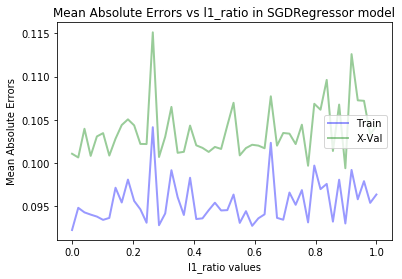

In [52]:
sgdreg = SGDRegressor(penalty='elasticnet')
ratio = np.linspace(0, 1, 50 )
train_scores, test_scores = calc_params(x_train, y_train, 'l1_ratio', ratio, sgdreg)

In [53]:
### best "l1_ratio" parameter 
np.argmin(train_scores - test_scores)

45

In [54]:
ratio[25]

0.5102040816326531

In [55]:
### Using the best "l1_ratio" parameters and the "elasticnet" penalty parameter to apply the model to the set-aside test data.
sgdreg = SGDRegressor(penalty='elasticnet', l1_ratio = ratio[8]) #plug in the optimal parameters from the Grid Search
sgdreg.fit(x_norm, y)
p = sgdreg.predict(x_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))
print'rmse is %0.3f'% (rmse), 'with penaly: elasticnet and alpha:0.0001' 
print'MAE is %0.3f'% (MAE), 'with penaly: elasticnet and alpha:0.0001' 

rmse is 0.125 with penaly: elasticnet and alpha:0.0001
MAE is 0.016 with penaly: elasticnet and alpha:0.0001


From the results all above(1c,1d,1e), we can see that the best model we have is SDG Regression model with l2 penalty which has the lowest RMSE and MAE of test(comparing with Standard Linear Regression, Ridge Regression, Lasso Regression). <br>For the SDG Regression penalty parameter, the result shows l1_ratio is 0.5102 which is closer to 1 rather than 0. In other words, the model aligns more to the 'l1' penalty which means it leads to more sparse solution, driving more coefficients to zero. <br>Grid Search function make model selection a lot more easier which can find out the best parameter very quickly. 